<a href="https://colab.research.google.com/github/RifqiMakarim/MachineLearning_Asah_Dicoding/blob/main/ML_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.preprocessing import StandardScaler

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
train = pd.read_csv('/content/Dataset_HousePrice/train.csv')
print(train.head())
print(train.info())
print(train.describe(include='all'))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [6]:
# Pemeriksaan Missing Values
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing Values:\n", missing_values)

less = missing_values[missing_values < 1000].index
over = missing_values[missing_values >= 1000].index

Missing Values:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [7]:
# Mengisi Missing Values bentuk numerik dengan median
numeric_features = train[less].select_dtypes(include=['number']).columns
train[numeric_features] = train[numeric_features].fillna(train[numeric_features].median())

# Mengisi Massing Values bentuk kategorikal dengan modus
categorical_features = train[less].select_dtypes(include=['object']).columns
for column in categorical_features:
    train[column] = train[column].fillna(train[column].mode()[0])


In [8]:
# Menghapus kolom dengan terlalu banyak missing values
df = train.drop(columns=over)
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing Values after cleaning:\n", missing_values)

Missing Values after cleaning:
 Series([], dtype: int64)


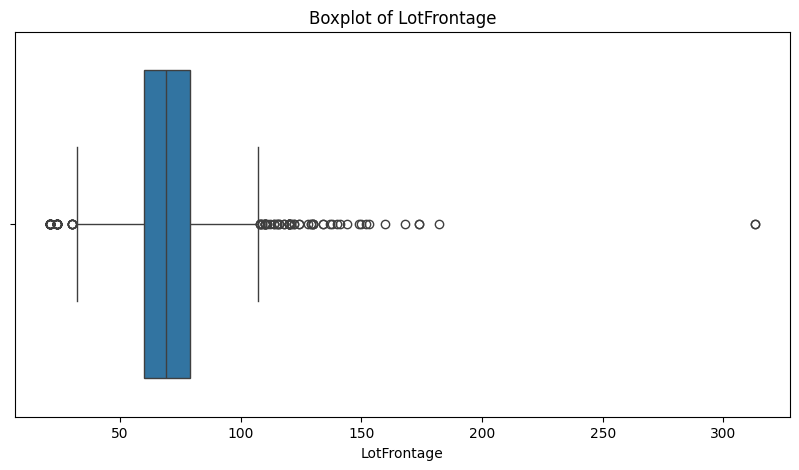

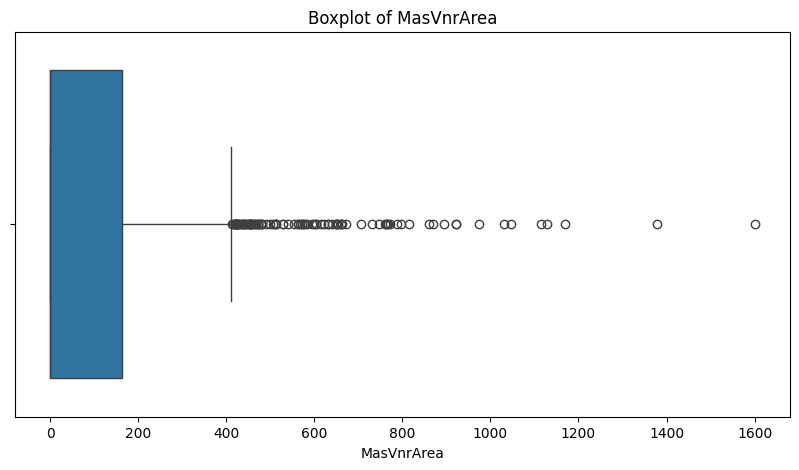

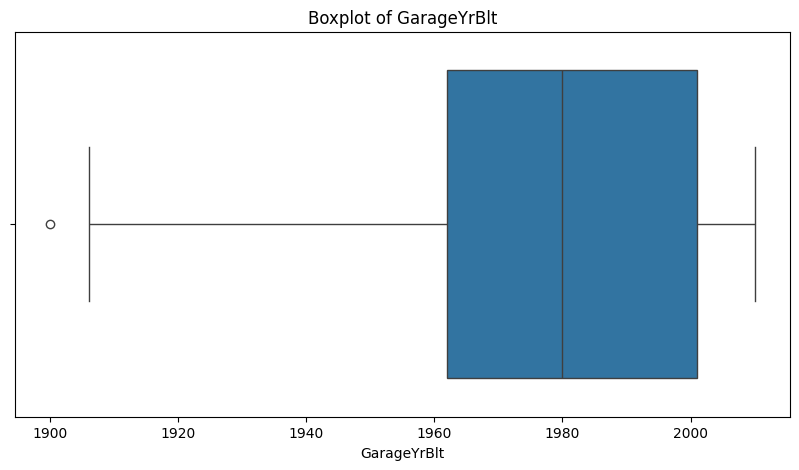

In [9]:
# Outlier
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [10]:
# Filter data menggunakan metode IQR (Rentang percentil 1 dan 3)
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1


In [11]:
# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_features]

In [12]:
# Menggabungkan kembali dengan kolom kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)


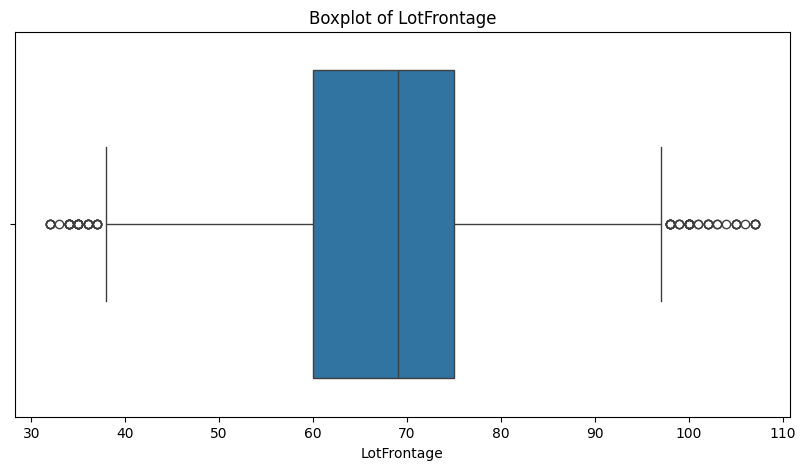

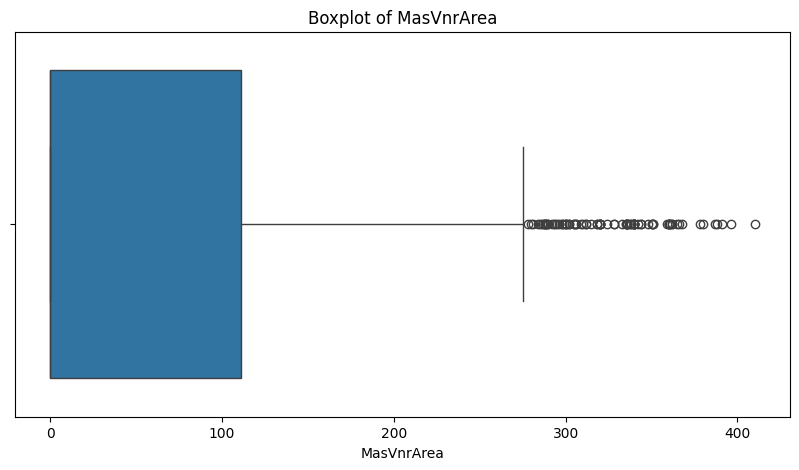

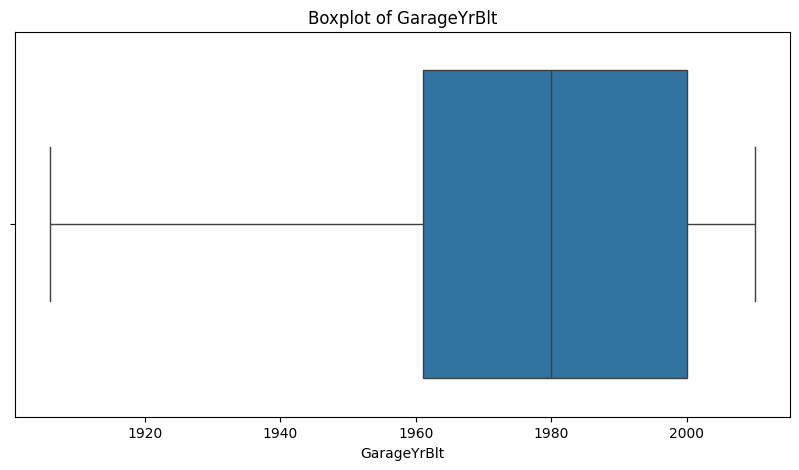

In [13]:
# Hasil Outlier setelah filtering
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [14]:
# Standardisasi Fitur Numerik
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

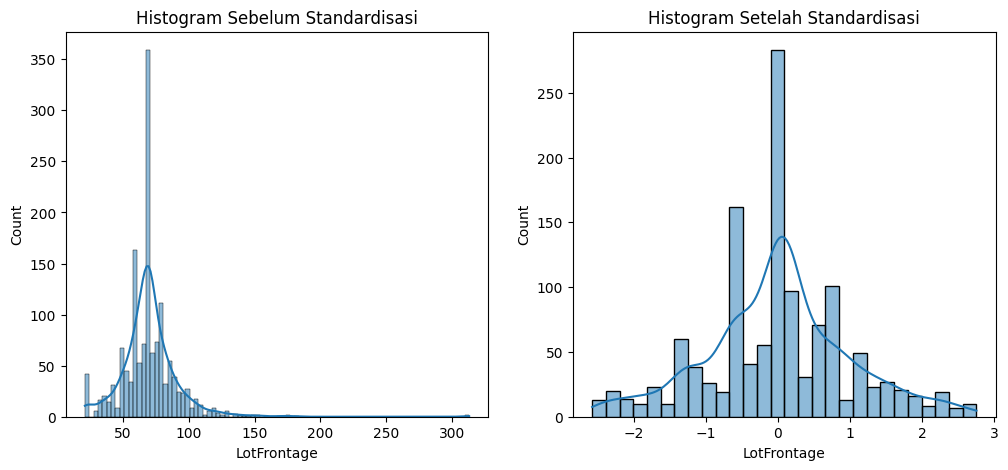

In [15]:
# Histogram sebelum standardisasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train[numeric_features[0]], kde=True)
plt.title("Histogram Sebelum Standardisasi")

# Histogram setelah standardisasi
plt.subplot(1, 2, 2)
sns.histplot(df[numeric_features[0]], kde=True)
plt.title("Histogram Setelah Standardisasi")
plt.show()

In [16]:
# identifikasi duplikasi
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
print(df[duplicates])

df = df.drop_duplicates()
print("Dataframe setelah menghapus duplikasi:")
print(df)


Number of duplicate rows: 2
      LotFrontage  MasVnrArea  GarageYrBlt MSZoning Street LotShape  \
971     -2.297189    0.401061     1.057175       RL   Pave      Reg   
1368     0.052259    1.016993     1.057175       RM   Pave      Reg   

     LandContour Utilities LotConfig LandSlope  ... KitchenQual Functional  \
971          Lvl    AllPub    Inside       Gtl  ...          Gd        Typ   
1368         Lvl    AllPub    Inside       Gtl  ...          Gd        Typ   

     FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
971           Gd    BuiltIn          RFn         TA         TA          Y   
1368          Gd     Attchd          Fin         TA         TA          Y   

     SaleType SaleCondition  
971        WD        Normal  
1368       WD        Normal  

[2 rows x 42 columns]
Dataframe setelah menghapus duplikasi:
      LotFrontage  MasVnrArea  GarageYrBlt MSZoning Street LotShape  \
0       -0.232523    1.267216     1.057175       RL   Pave      Reg 

Sebagian besar algoritma machine learning didasarkan pada operasi matematika yang melibatkan perhitungan jarak, gradien, atau distribusi data. Misalnya, regresi linier menghitung persamaan garis menggunakan koefisien yang diterapkan pada fitur numerik. Jika data inputan berupa kategori (seperti "merah," "biru," "hijau"), tidak ada cara langsung untuk memasukkan nilai kategori tersebut ke dalam perhitungan matematika.

In [17]:
# melihat data kategorical
category_features = df.select_dtypes(include=['object']).columns
df[categorical_features]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal


In [18]:
# Melakukna One Hot Encoding
df_one_hot = pd.get_dummies(df,columns=categorical_features)
df_one_hot

,LotFrontage,MasVnrArea,GarageYrBlt,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.232523,1.267216,1.057175,False,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False
1,0.835408,-0.619077,-0.056825,False,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False
2,-0.018937,0.940002,0.974656,False,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False
3,-0.588500,-0.619077,0.850879,False,False,False,True,False,False,True,...,False,False,False,True,True,False,False,False,False,False
4,1.120189,2.749303,0.933397,False,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.446109,-0.619077,0.892138,False,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False
1456,1.191385,0.526172,0.025693,False,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False
1457,-0.161328,-0.619077,-1.500899,False,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False
1458,-0.018937,-0.619077,-1.129566,False,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False


In [19]:
# Label Encoding dengan Label encoder
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
df_lencoder = pd.DataFrame(df)

for col in category_features:
  df_lencoder[col] = label_encoder.fit_transform(df[col])

# Menampilkan hasil
df_lencoder

,LotFrontage,MasVnrArea,GarageYrBlt,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-0.232523,1.267216,1.057175,3,1,3,3,0,4,0,...,2,6,2,1,1,4,4,2,8,4
1,0.835408,-0.619077,-0.056825,3,1,3,3,0,2,0,...,3,6,4,1,1,4,4,2,8,4
2,-0.018937,0.940002,0.974656,3,1,0,3,0,4,0,...,2,6,4,1,1,4,4,2,8,4
3,-0.588500,-0.619077,0.850879,3,1,0,3,0,0,0,...,2,6,2,5,2,4,4,2,8,0
4,1.120189,2.749303,0.933397,3,1,0,3,0,2,0,...,2,6,4,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.446109,-0.619077,0.892138,3,1,3,3,0,4,0,...,3,6,4,1,1,4,4,2,8,4
1456,1.191385,0.526172,0.025693,3,1,3,3,0,4,0,...,3,2,4,1,2,4,4,2,8,4
1457,-0.161328,-0.619077,-1.500899,3,1,3,3,0,4,0,...,2,6,2,1,1,4,4,2,8,4
1458,-0.018937,-0.619077,-1.129566,3,1,3,3,0,4,0,...,2,6,2,1,2,4,4,2,8,4


**One Hot Encoding**


*   Kelebihan
      1.   One-hot encoding tidak mengasumsikan adanya urutan atau hierarki di antara kategori, yang sangat cocok untuk data kategorikal nominal (misalnya, warna, jenis kelamin, dll.).

      2. Karena setiap kategori diubah menjadi kolom terpisah dengan nilai biner (0 atau 1), tidak ada risiko bahwa model akan memperlakukan satu kategori sebagai lebih besar atau lebih kecil daripada yang lain.

      3. Model yang sensitif terhadap skala numerik, seperti regresi linier, cenderung berfungsi lebih baik dengan one-hot encoding karena tidak ada hubungan numerik yang diciptakan antara kategori.

*   Kekurangan
      1.   One-hot encoding dapat menghasilkan DataFrame dengan dimensi yang sangat tinggi jika ada banyak kategori. Hal ini bisa menyebabkan masalah "curse of dimensionality," yang membuat model lebih lambat dan memerlukan lebih banyak memori.
      2. Hasil one-hot encoding sering kali menjadi sparse matrix, di mana sebagian besar nilainya adalah 0 atau False sehingga bisa memperlambat proses pelatihan.
      3. Untuk fitur yang memiliki ribuan kategori (misalnya, kode pos), one-hot encoding bisa menjadi tidak praktis karena akan menghasilkan ribuan kolom baru.







**Label Encoding**


*   Kelebihan
      1. Label encoding mudah diimplementasikan dan tidak menambah dimensi dataset karena setiap kategori diubah menjadi angka tunggal.
      2. Tidak seperti one-hot encoding, label encoding tidak meningkatkan jumlah kolom dalam dataset, yang membuatnya lebih hemat memori dan lebih cepat untuk diproses.
      3. Label encoding cocok untuk data kategorikal ordinal di mana ada urutan yang jelas antara kategori (misalnya, rendah, sedang, tinggi).

*   Kekurangan
      1. Label encoding mengasumsikan bahwa ada urutan atau hierarki antara kategori, yang tidak selalu sesuai dengan kenyataan untuk data nominal. Ini bisa menyebabkan model membuat kesimpulan yang salah karena satu kategori mungkin dianggap lebih besar atau lebih kecil dari yang lain.
      2. Jika digunakan pada data kategorikal nominal, label encoding dapat memperkenalkan bias ke dalam model karena model dapat salah menganggap bahwa ada hubungan numerik antara kategori yang sebenarnya setara.
      3. Label encoding kurang cocok untuk fitur dengan banyak kategori karena model bisa saja memberi terlalu banyak bobot pada satu kategori yang secara numerik lebih besar daripada yang lain.






In [21]:
df_lencoder.head()

,LotFrontage,MasVnrArea,GarageYrBlt,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-0.232523,1.267216,1.057175,3,1,3,3,0,4,0,...,2,6,2,1,1,4,4,2,8,4
1,0.835408,-0.619077,-0.056825,3,1,3,3,0,2,0,...,3,6,4,1,1,4,4,2,8,4
2,-0.018937,0.940002,0.974656,3,1,0,3,0,4,0,...,2,6,4,1,1,4,4,2,8,4
3,-0.588500,-0.619077,0.850879,3,1,0,3,0,0,0,...,2,6,2,5,2,4,4,2,8,0
4,1.120189,2.749303,0.933397,3,1,0,3,0,2,0,...,2,6,4,1,1,4,4,2,8,4


In [23]:
# Menghitung jumlah dan persentase missing values
missing_values = df_lencoder.isnull().sum()
missing_percentage = (missing_values / len(df_lencoder)) * 100

missing_data = pd.DataFrame({
    'Missing Value' : missing_values,
    'Percenrage' : missing_percentage
}).sort_values(by='Missing Value',ascending = False)

missing_data[missing_data['Missing Value'] > 0 ]


,Missing Value,Percenrage
